In [1]:
import requests

response = requests.get("http://127.0.0.1:11434")
print(response.text)

Ollama is running


In [2]:
from langchain_ollama import ChatOllama
from langchain_core.prompts import ChatPromptTemplate
from pprint import pprint

# Ollama를 사용하여 로컬에서 실행 중인 deepseek-r1:1.5b 모델 로드
llm = ChatOllama(model="deepseek-r1:1.5b")

# 더 정확한 응답을 위한 개선된 프롬프트
prompt_template = ChatPromptTemplate.from_messages([
    ("system", "You are an AI assistant that provides accurate and detailed answers."),
    ("human", "Q: {question}\nA:")
])

# 최신 LangChain 방식: RunnableSequence 활용
chain = prompt_template | llm

# 실행 예시
question = "What is LangChain?"
response = chain.invoke({"question": question})

print(type(response))
pprint(response.content)


<class 'langchain_core.messages.ai.AIMessage'>
('<think>\n'
 'Alright, I need to explain what LangChain is. From the given information, '
 "it's a Python library used for integrating language models with machine "
 'learning pipelines. It simplifies model configuration and data handling.\n'
 '\n'
 'I should mention its main components: LanguageModelingPipeline and '
 'ModelConfig. Also, highlight how it streamlines tasks like training, '
 'inference, and fine-tuning models.\n'
 '\n'
 'It would be helpful to outline the workflow from data loading to model '
 'training, showing how LangChain automates these steps with minimal '
 'boilerplate code. Mention the importance of a good architecture for '
 'efficiency and scalability.\n'
 '\n'
 "Finally, I'll wrap it up by stating that LangChain is user-friendly, "
 'accessible, and suitable for various machine learning scenarios.\n'
 '</think>\n'
 '\n'
 'LangChain is a Python library designed to simplify the integration of '
 'language models 

In [4]:
from langchain_ollama import ChatOllama
from langchain_core.prompts import ChatPromptTemplate

# Ollama를 사용하여 로컬에서 실행 중인 qwen2.5:1.5b 모델 로드
#llm = ChatOllama(model="qwen2.5:1.5b")
#qwen3:1.7b
llm = ChatOllama(model="qwen3:1.7b")


# 더 정확한 응답을 위한 개선된 프롬프트
prompt_template = ChatPromptTemplate.from_messages([
    ("system", "You are an AI assistant that provides accurate and detailed answers."),
    ("human", "Q: {question}\nA:")
])

# 최신 LangChain 방식: RunnableSequence 활용
chain = prompt_template | llm

# 실행 예시
question = "파이썬은 무엇인가요? 한글로 답변해 줘"
response = chain.invoke({"question": question})

print(response.content)

<think>
Okay, the user is asking what Python is, and they want the answer in Korean. Let me start by recalling the basics of Python. Python is a programming language, right? It's known for being easy to learn and powerful. I should mention its creation, like Guido van Rossum, and when it was released. Oh, and the version numbers, like 3.x and 2.x. Maybe explain why it's popular—because of its simplicity and the vast library of modules. Also, note that it's used in various fields like web development, data analysis, machine learning. Should I include something about the syntax being readable? Maybe. And the fact that it's open-source. Wait, the user might not know all these details, so keep it concise but informative. Let me structure the answer with key points: definition, creator, release date, features, applications, and maybe a summary. Check for any mistakes. Oh, and make sure the tone is helpful and not too technical. Alright, that should cover it.
</think>

파이썬은 프로그래밍 언어로, 간단하고 명

In [5]:
from IPython.display import display, Markdown
from langchain_ollama import ChatOllama

deepseek = ChatOllama(model="deepseek-r1:1.5b", temperature=0.5)

answer = []
for chunk in deepseek.stream("which is bigger between 9.9 and 9.11?"):
    answer.append(chunk.content)
    print(chunk.content, end="", flush=True)

<think>
I need to compare the two numbers, 9.9 and 9.11.

First, I'll align their decimal places by expressing 9.9 as 9.90.

Next, I'll compare each digit from left to right.

Both numbers have a 9 in the ones place, so they are equal there.

Then, I'll look at the tenths place. In 9.90, the tenths digit is 9, and in 9.11, it's 1.

Since 9 is greater than 1, 9.90 is larger than 9.11.
</think>

To determine which number is bigger between **9.9** and **9.11**, let's compare them step by step.

### Step 1: Align the Decimal Places
First, it's helpful to write both numbers with the same number of decimal places for easier comparison:

\[
9.9 \quad \text{and} \quad 9.11
\]

We can rewrite **9.9** as **9.90** to have two decimal places:

\[
9.90 \quad \text{and} \quad 9.11
\]

### Step 2: Compare the Whole Number Part
Both numbers have the same whole number part, which is **9**.

Since they are equal in the ones place, we move to the next decimal place.

### Step 3: Compare the Tenths Place


In [6]:

answer_md=''.join([i for i in answer])
display(Markdown(answer_md))    

<think>
I need to compare the two numbers, 9.9 and 9.11.

First, I'll align their decimal places by expressing 9.9 as 9.90.

Next, I'll compare each digit from left to right.

Both numbers have a 9 in the ones place, so they are equal there.

Then, I'll look at the tenths place. In 9.90, the tenths digit is 9, and in 9.11, it's 1.

Since 9 is greater than 1, 9.90 is larger than 9.11.
</think>

To determine which number is bigger between **9.9** and **9.11**, let's compare them step by step.

### Step 1: Align the Decimal Places
First, it's helpful to write both numbers with the same number of decimal places for easier comparison:

\[
9.9 \quad \text{and} \quad 9.11
\]

We can rewrite **9.9** as **9.90** to have two decimal places:

\[
9.90 \quad \text{and} \quad 9.11
\]

### Step 2: Compare the Whole Number Part
Both numbers have the same whole number part, which is **9**.

Since they are equal in the ones place, we move to the next decimal place.

### Step 3: Compare the Tenths Place
- **Tenths place:**  
  - In **9.90**, the tenths digit is **9**.  
  - In **9.11**, the tenths digit is **1**.

Since **9 > 1**, **9.90** is greater than **9.11**.

### Conclusion
\[
\boxed{9.9 \text{ is bigger}}
\]

In [7]:

  
#model = ChatOllama(model="exaone3.5:2.4b", temperature=0.5)
#model = ChatOllama(model="qwen2.5:1.5b", temperature=0.5)
model = ChatOllama(model="qwen3:1.7b", temperature=0.1)

answer = []
for chunk in model.stream("9.9와 9.11 중 무엇이 더 큰가요?"):
    answer.append(chunk.content)
    print(chunk.content, end="", flush=True)


<think>
Okay, so the question is asking which is bigger between 9.9 and 9.11. Let me think. Both numbers are decimals, right? So they have the same whole number part, which is 9. But then the decimal parts are different. The first number is 9.9, which is 9 and 9 tenths. The second one is 9.11, which is 9 and 11 hundredths. 

Wait, so the tenths place is 9 in the first number and 1 in the second. But the second number has two decimal places. Hmm. So when comparing decimals, you start from the leftmost digit. Both numbers have the same integer part, so that's equal. Then, looking at the first decimal place: 9.9 has 9 in the tenths place, and 9.11 has 1 in the tenths place. So 9 is greater than 1, right? So even though the second number has more decimal places, the tenths place is smaller. Therefore, 9.9 is larger than 9.11.

But wait, let me make sure. Maybe I should write them out to compare. 9.9 is the same as 9.90. So 9.90 versus 9.11. Comparing the whole numbers, they're both 9. Then

In [8]:

answer_md=''.join([i for i in answer])
display(Markdown(answer_md))


<think>
Okay, so the question is asking which is bigger between 9.9 and 9.11. Let me think. Both numbers are decimals, right? So they have the same whole number part, which is 9. But then the decimal parts are different. The first number is 9.9, which is 9 and 9 tenths. The second one is 9.11, which is 9 and 11 hundredths. 

Wait, so the tenths place is 9 in the first number and 1 in the second. But the second number has two decimal places. Hmm. So when comparing decimals, you start from the leftmost digit. Both numbers have the same integer part, so that's equal. Then, looking at the first decimal place: 9.9 has 9 in the tenths place, and 9.11 has 1 in the tenths place. So 9 is greater than 1, right? So even though the second number has more decimal places, the tenths place is smaller. Therefore, 9.9 is larger than 9.11.

But wait, let me make sure. Maybe I should write them out to compare. 9.9 is the same as 9.90. So 9.90 versus 9.11. Comparing the whole numbers, they're both 9. Then, the tenths place: 9 vs 1. Since 9 is greater than 1, the first number is larger. Even if the second number has more decimal places, the tenths place is already different. So yeah, 9.9 is bigger. 

I think that's right. The key is that the tenths place is where the difference is. Even though 9.11 has more decimal digits, the tenths place is smaller, so the whole number part is the same, but the tenths place is different. So 9.9 is larger.
</think>

9.9는 9.11보다 더 큰 수입니다.  
**이유:**  
- 두 수 모두 9를 가진다.  
- 9.9는 9.90과 같으며, 9.11은 9.11과 비교할 때, **tenths place(십분의 자리)**에서 9가 1보다 크기 때문에 9.9가 더 커요.  

따라서 **9.9 > 9.11**입니다.

### LangGraph를 사용하여 DeepSeek 모델(추론)과 Qwen 모델(한글응답)을 연동하기
* poetry add langgraph

In [9]:
from langchain_ollama import ChatOllama
from langgraph.graph import START, StateGraph
from typing_extensions import TypedDict
from langchain_core.prompts import ChatPromptTemplate

# 추론 모델
reasoning_model = ChatOllama(model="deepseek-r1:1.5b", temperature=0, stop=["</think>"])
print(reasoning_model)

#응답 모델 (한글처리 가능)
#generation_model = ChatOllama(model="qwen2.5:1.5b", temperature=0.5)
generation_model = ChatOllama(model="qwen3:1.7b", temperature=0.5)
#qwen3:1.7b
print(generation_model)

answer_prompt = ChatPromptTemplate([
    (
        "system",
        """
        당신은 사용자의 질문에 대해 명확하고 포괄적인 답변을 제공하는 AI 어시스턴트입니다.

        당신의 작업은 다음과 같습니다:
        - 질문과 제공된 추론을 신중하게 분석하세요.
        - 추론에서 얻은 통찰력을 포함하여 잘 구조화된 답변을 생성하세요.
        - 답변이 사용자의 질문에 직접적으로 대응하도록 하세요.
        - 정보를 명확하고 자연스럽게 전달하되, 추론 과정을 명시적으로 언급하지 마세요.

        지침:
        - 답변을 대화 형식으로 작성하고, 흥미롭게 전달하세요.
        - 중요한 포인트를 모두 다루면서도 명확하고 간결하게 작성하세요.
        - 제공된 추론을 사용한다는 것을 언급하지 말고, 그 통찰력을 자연스럽게 포함시키세요.
        - 도움이 되고 전문적인 톤을 유지하세요.

        목표: 사용자의 질문에 직접적으로 대응하면서 추론 과정에서 얻은 통찰력을 자연스럽게 포함한 정보 제공입니다.
        """
    ),
    (
        "human",
        """
        질문: {question}
        추론: {thinking}
        """
    )
])
print(answer_prompt)

#LangGraph에서 State 사용자정의 클래스는 노드 간의 정보를 전달하는 틀입니다. 
#노드 간에 계속 전달하고 싶거나, 그래프 내에서 유지해야 할 정보를 미리 정의힙니다. 
class State(TypedDict):
    question: str
    thinking: str
    answer: str

#DeepSeek를 통해서 추론 부분까지만 생성합니다. 
def think(state: State):
    question = state["question"]
    response = reasoning_model.invoke(question)
    #print(response.content)
    return {"thinking": response.content}

#Qwen를 통해서 결과 출력 부분을 생성합니다.
def generate(state: State):
    messages = answer_prompt.invoke({"question": state["question"], "thinking": state["thinking"]})
    response = generation_model.invoke(messages)
    print(response.content)
    return {"answer": response.content}

# 그래프 컴파일
graph_builder = StateGraph(State).add_sequence([think, generate])
graph_builder.add_edge(START, "think")
graph = graph_builder.compile()

# 입력 데이터
inputs = {"question": "9.9와 9.11 중 무엇이 더 큰가요?"}

# invoke()를 사용하여 그래프 호출
result = graph.invoke(inputs)
print(result)

# 결과 출력
print("==> 생성된 답변: \n")
print(result["answer"])

model='deepseek-r1:1.5b' temperature=0.0 stop=['</think>']
model='qwen3:1.7b' temperature=0.5
input_variables=['question', 'thinking'] input_types={} partial_variables={} messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], input_types={}, partial_variables={}, template='\n        당신은 사용자의 질문에 대해 명확하고 포괄적인 답변을 제공하는 AI 어시스턴트입니다.\n\n        당신의 작업은 다음과 같습니다:\n        - 질문과 제공된 추론을 신중하게 분석하세요.\n        - 추론에서 얻은 통찰력을 포함하여 잘 구조화된 답변을 생성하세요.\n        - 답변이 사용자의 질문에 직접적으로 대응하도록 하세요.\n        - 정보를 명확하고 자연스럽게 전달하되, 추론 과정을 명시적으로 언급하지 마세요.\n\n        지침:\n        - 답변을 대화 형식으로 작성하고, 흥미롭게 전달하세요.\n        - 중요한 포인트를 모두 다루면서도 명확하고 간결하게 작성하세요.\n        - 제공된 추론을 사용한다는 것을 언급하지 말고, 그 통찰력을 자연스럽게 포함시키세요.\n        - 도움이 되고 전문적인 톤을 유지하세요.\n\n        목표: 사용자의 질문에 직접적으로 대응하면서 추론 과정에서 얻은 통찰력을 자연스럽게 포함한 정보 제공입니다.\n        '), additional_kwargs={}), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['question', 'thinking'], input_types={}, partial_variables={}, templa

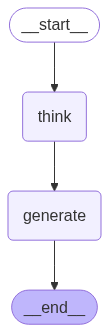

In [10]:
from IPython.display import Image, display
from langchain_core.runnables.graph import CurveStyle, MermaidDrawMethod, NodeStyles

display(
    Image(
        graph.get_graph().draw_mermaid_png(draw_method=MermaidDrawMethod.API)        
    )
)

In [11]:
inputs = {"question": "9.9와 9.11 중 무엇이 더 큰가요?"}

async for event in graph.astream_events(inputs, version="v2"):
    kind = event["event"]
    if kind == "on_chat_model_stream":
        print(event['data']['chunk'].content, end="", flush=True)

<think>
First, I need to compare the two numbers: 9.9 and 9.11.

Both numbers have the same whole number part, which is 9.

To make a fair comparison, I'll align their decimal places by writing 9.9 as 9.90.

Now, comparing each digit from left to right:

- The units place for both numbers is 9.
- In the tenths place, 9 has a 9 and 9.11 has a 1.
  
Since 9 is greater than 1 in the tenths place, 9.90 is larger than 9.11.

Therefore, 9.9 is greater than 9.11.
<think>
Okay, let's see. The user is asking which is bigger between 9.9 and 9.11. Hmm, both numbers are decimals. The whole numbers are the same, 9. So I need to look at the decimal parts.

First, I remember that when comparing decimals, you start from the leftmost digit. Both numbers have 9 in the units place. Then, the tenths place. For 9.9, the tenths digit is 9, and for 9.11, it's 1. Wait, but 9.9 is actually 9.90 when written with two decimal places. So comparing 9.90 and 9.11, the tenths place is 9 vs 1. Since 9 is greater than

### 2개의 모델을 연동한 코드를 Gradio 를 사용하여 UI로 실행하기

In [ ]:
import gradio as gr
import os
import sys
from langchain_ollama import ChatOllama
from langgraph.graph import START, StateGraph
from typing_extensions import List, TypedDict
from langchain_core.prompts import ChatPromptTemplate

# UTF-8 인코딩 강제 설정 (Jupyter 노트북 호환)
os.environ['PYTHONIOENCODING'] = 'utf-8'
os.environ['LANG'] = 'ko_KR.UTF-8'
os.environ['LC_ALL'] = 'ko_KR.UTF-8'

# Jupyter 환경에서는 reconfigure 대신 환경변수로 처리
try:
    if hasattr(sys.stdout, 'reconfigure') and sys.stdout.encoding != 'utf-8':
        sys.stdout.reconfigure(encoding='utf-8')
except (AttributeError, OSError):
    # Jupyter 노트북이나 다른 환경에서는 패스
    pass

# 모델 설정: 두 개의 서로 다른 모델을 사용하여 추론과 답변 생성을 수행
# - reasoning_model: 추론을 담당하는 모델 (온도 낮음, 정확한 분석용)
# - generation_model: 답변 생성을 담당하는 모델 (온도 높음, 창의적 응답용)
reasoning_model = ChatOllama(
    model="deepseek-r1:1.5b", 
    temperature=0, 
    stop=["</think>"]
)

generation_model = ChatOllama(
    model="qwen2.5:1.5b", 
    #model="qwen3:1.7b",
    temperature=0.7
)

# 상태(State) 정의: 그래프에서 상태를 유지하기 위한 데이터 구조
class State(TypedDict):
    question: str   # 사용자의 질문
    thinking: str   # 추론 결과
    answer: str     # 최종 답변

# 개선된 프롬프트 템플릿
answer_prompt = ChatPromptTemplate([
    (
        "system",
        """당신은 한국어로 응답하는 AI 어시스턴트입니다. 
        반드시 한국어로만 답변하세요.
        
        당신의 작업:
        - 질문과 제공된 추론을 신중하게 분석하세요.
        - 추론에서 얻은 통찰력을 포함하여 잘 구조화된 한국어 답변을 생성하세요.
        - 답변이 사용자의 질문에 직접적으로 대응하도록 하세요.
        - 정보를 명확하고 자연스럽게 전달하되, 추론 과정을 명시적으로 언급하지 마세요.
        
        지침:
        - 답변을 대화 형식으로 작성하고, 흥미롭게 전달하세요.
        - 중요한 포인트를 모두 다루면서도 명확하고 간결하게 작성하세요.
        - 제공된 추론을 사용한다는 것을 언급하지 말고, 그 통찰력을 자연스럽게 포함시키세요.
        - 도움이 되고 전문적인 톤을 유지하세요.
        
        중요: 반드시 한국어로만 응답하세요."""
    ),
    (
        "human",
        """질문: {question}
        
        추론 과정: {thinking}
        
        위 내용을 바탕으로 한국어로 답변해주세요:"""
    )
])


def ensure_utf8_string(text):
    """문자열이 UTF-8로 제대로 인코딩되었는지 확인하고 변환"""
    if text is None:
        return ""
    if isinstance(text, bytes):
        try:
            return text.decode('utf-8')
        except UnicodeDecodeError:
            return text.decode('utf-8', errors='ignore')
    
    # 문자열이지만 인코딩 문제가 있을 수 있는 경우 처리
    if isinstance(text, str):
        try:
            # 문자열을 UTF-8로 인코딩했다가 다시 디코딩하여 정리
            return text.encode('utf-8').decode('utf-8')
        except (UnicodeEncodeError, UnicodeDecodeError):
            return text
    
    return str(text)

# DeepSeek를 통해서 추론 부분까지만 생성
def think(state: State):
    question = state["question"]
    print(f"[DEBUG] 입력 질문: {question}")
    print(f"[DEBUG] 질문 타입: {type(question)}")
    
    response = reasoning_model.invoke(question)
    #thinking_content = ensure_utf8_string(response.content)
    thinking_content = response.content
    
    print(f"[DEBUG] 추론 결과 타입: {type(response.content)}")
    print(f"[DEBUG] 추론 결과 길이: {len(thinking_content)}")
    print(f"[DEBUG] 추론 결과 미리보기: {thinking_content[:200]}...")
    
    return {"thinking": thinking_content}

# qwen2.5를 통해서 결과 출력 부분을 생성
def generate(state: State):
    # question = ensure_utf8_string(state["question"])
    # thinking = ensure_utf8_string(state["thinking"])
    
    question = state["question"]
    thinking = state["thinking"]
    
    print(f"[DEBUG] generate 함수 - 질문: {question}")
    print(f"[DEBUG] generate 함수 - 추론 길이: {len(thinking)}")
    print(f"[DEBUG] generate 함수 - 추론 미리보기: {thinking[:200]}...")
    
    messages = answer_prompt.invoke({
        "question": question, 
        "thinking": thinking
    })
    
    print(f"[DEBUG] 프롬프트 메시지 생성 완료")
    
    response = generation_model.invoke(messages)
    #answer_content = ensure_utf8_string(response.content)
    answer_content = response.content
    
    print(f"[DEBUG] 최종 응답 타입: {type(response.content)}")
    print(f"[DEBUG] 최종 응답 길이: {len(answer_content)}")
    print(f"[DEBUG] 최종 응답 내용: {answer_content}")
    
    return {"answer": answer_content}

# 그래프 생성 함수: 상태(State) 간의 흐름을 정의
def create_graph():
    graph_builder = StateGraph(State).add_sequence([think, generate])
    graph_builder.add_edge(START, "think")
    return graph_builder.compile()

# Gradio 인터페이스 생성 및 실행
def chatbot_interface(message, history):
    graph = create_graph()
    inputs = {"question": message}
    result = graph.invoke(inputs)
    return result["answer"]

iface = gr.ChatInterface(fn=chatbot_interface, title="AI 챗봇", description="질문을 입력하면 AI가 답변을 제공합니다.")

# Gradio 인터페이스 설정
# def launch_gradio():
#     iface = gr.Interface(fn=chatbot_interface, inputs="text", outputs="text", title="AI 챗봇", description="질문을 입력하면 AI가 답변을 제공합니다.")
#     iface.launch()

if __name__ == "__main__":
    iface.launch()
    #launch_gradio()

c:\Users\user\AppData\Local\pypoetry\Cache\virtualenvs\langchain-basic-kGdHTiMZ-py3.12\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\user\AppData\Local\pypoetry\Cache\virtualenvs\langchain-basic-kGdHTiMZ-py3.12\Lib\site-packages\gradio\chat_interface.py:339: UserWarning: The 'tuples' format for chatbot messages is deprecated and will be removed in a future version of Gradio. Please set type='messages' instead, which uses openai-style 'role' and 'content' keys.
  self.chatbot = Chatbot(


* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


[DEBUG] 입력 질문: 9.9와 9.11 중 무엇이 더 큰가요?
[DEBUG] 질문 타입: <class 'str'>
[DEBUG] 추론 결과 타입: <class 'str'>
[DEBUG] 추론 결과 길이: 621
[DEBUG] 추론 결과 미리보기: <think>
First, I need to compare the two numbers: 9.9 and 9.11.

To make an accurate comparison, it's helpful to express both numbers with the same number of decimal places. This means converting 9.9 ...
[DEBUG] generate 함수 - 질문: 9.9와 9.11 중 무엇이 더 큰가요?
[DEBUG] generate 함수 - 추론 길이: 621
[DEBUG] generate 함수 - 추론 미리보기: <think>
First, I need to compare the two numbers: 9.9 and 9.11.

To make an accurate comparison, it's helpful to express both numbers with the same number of decimal places. This means converting 9.9 ...
[DEBUG] 프롬프트 메시지 생성 완료
[DEBUG] 최종 응답 타입: <class 'str'>
[DEBUG] 최종 응답 길이: 215
[DEBUG] 최종 응답 내용: 9.9는 9.11보다 더 큰 수입니다. 이 이유는 두 숫자 모두 소수점 아래의 한 자릿수에서 9를 가짐에 따라 9.90이 더 크다는 것입니다. 9.90은 9.9와 같은 방식으로 표현되므로, 둘 다 9로 시작하므로 그 이후의 비교가 불필요합니다. 즉, 9.11의 소수점이 1인 반면 9.90의 소수점이 9인 점에서 차이를 보이는 것입니다. 따라서, 9.9은 9.11보다 더 큰 수입니다.
[DEBUG] 입력 질문: Langchain이란 